# Lab 5: Evaluating a classification model

### Model evaluation metrics for classification tasks
- **Classification problems:** Classification accuracy, confusion matrix, ROC, AUC



Pima Indian Diabetes dataset

In [1]:
# read the data into a Pandas DataFrame
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [2]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Question:** Can we predict the diabetes status of a patient given their health measurements?

In [3]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [4]:
# split X and y into training and testing sets
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

## Confusion matrix

Table that describes the performance of a classification model

In [7]:
# IMPORTANT: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_class))

[[114  16]
 [ 46  16]]


- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 classes**
- The format shown here is **not** universal

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes 
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes 

In [8]:
# print the first 25 true and predicted classes
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25]) 

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
# save confusion matrix and slice into four pieces
c_matrix = confusion_matrix(y_test, y_pred_class)
TP = c_matrix[1, 1]
TN = c_matrix[0, 0]
FP = c_matrix[0, 1]
FN = c_matrix[1, 0]

Then, We can caculate different metrics such as **False Positive Rate:** 

In [10]:
print(FP / float(FP + TN))

0.12307692307692308


Many other metrics can be computed: [F1 score](https://en.wikipedia.org/wiki/F-score), [Matthews correlation coefficient](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient), etc.

In [11]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [12]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [13]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [14]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

**AUC** is the percentage of the ROC plot that is **underneath the curve**:

In [15]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn import metrics
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

## K Fold Cross Validation (K=10)

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)

[0.76623377 0.64935065 0.7012987  0.62337662 0.7012987  0.7012987
 0.68831169 0.75324675 0.65789474 0.72368421]


In [17]:
# calculate average accuracy 
print(scores.mean())

0.6965994531784006


In [18]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225

In [180]:
########################
#ARCH LATHAM
#LAB 5
#FEB 25, 2021
########################

In [181]:
col_names = ["has_ip", "long_url", "short_service", "has_at", "double_slash_redirect",
           "pref_suf", "has_sub_domain", "ssl_state", "long_domain", "favicon", "port",
           "https_token", "req_url", "url_of_anchor", "tag_links", "SFH", 
           "submit_to_email", "abnormal_url", "redirect", "mouseover", "right_click",
           "popup", "iframe", "domain_Age", "dns_record", "traffic", "page_rank",
           "google_index", "links_to_page", "stats_report", "target"]
dat = pd.read_csv('lab3phishing.csv', names=col_names)
dat.head()

,has_ip,long_url,short_service,has_at,double_slash_redirect,pref_suf,has_sub_domain,ssl_state,long_domain,favicon,...,popup,iframe,domain_Age,dns_record,traffic,page_rank,google_index,links_to_page,stats_report,target
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,-1


In [182]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('target', axis=1), dat['target'] ,test_size=0.25, random_state=10)

In [183]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()

hp_grid = [
{'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.1, 0.5, 1.0, 8.0, 100]},
{'penalty': ['l2', 'none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'C': [0.1, 0.5, 1.0, 8.0, 100]},
{'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.1, 0.5, 1.0, 8.0, 100], 'l1_ratio':[0, 1]}
]
    
classifier = GridSearchCV(lr, hp_grid)
classifier.fit(X_train, y_train)

C:\Users\archk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter wa

C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C an

C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C an

C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\archk\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1.0, 8.0, 100], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.1, 0.5, 1.0, 8.0, 100],
                          'penalty': ['l2', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
              

In [184]:
predicted = classifier.predict(X_test)
print("Accuracy: %.2f" %metrics.accuracy_score(y_test, predicted))
print("Best Penalty: %s" %classifier.best_estimator_.penalty)
print("Best Solver: %s" %classifier.best_estimator_.solver)
print("Best C: %s" %classifier.best_estimator_.C)

Accuracy: 0.95
Best Penalty: l2
Best Solver: newton-cg
Best C: 0.1


In [185]:
cm = confusion_matrix(y_test, predicted)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [186]:
recall = TP / float(TP+FN)
fpr = FP / float(FP + TN)
prec = TP / float(TP+FP)
print("Recall: %.2f" %recall)
print("False Positive Rate: %.2f" %fpr)
print("Precision: %.2f" %prec)

Recall: 0.92
False Positive Rate: 0.03
Precision: 0.96


In [187]:
prpr = classifier.predict_proba(X_test)[:, 1]

In [188]:
fpr, tpr, threshold = metrics.roc_curve(y_test.values, prpr)
roc_auc = metrics.auc(fpr, tpr)

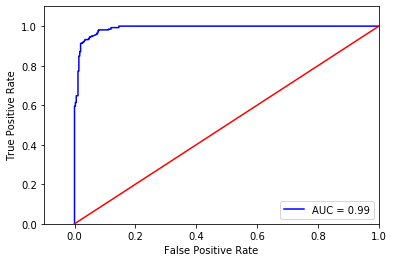

In [191]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [192]:
print("AUC: ", metrics.roc_auc_score(y_test, prpr))

AUC:  0.9897997835497836
